In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for density plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('first_try.keras')

# Load the data from the SQLite database
conn = sqlite3.connect('../../../../data/nfp2/nfp2.db')  # Adjust the path to your database file
query = "SELECT * FROM stellarators"  # Adjust your query as needed
data_df = pd.read_sql_query(query, conn)
conn.close()

# Clean the data
data_df_clean = data_df[data_df['convergence'] == 1]
data_df_clean = data_df_clean.dropna(subset=['quasiisodynamic'])

# Define features (X) and target (Y)
X = data_df_clean[['rbc_1_0', 'rbc_m1_1', 'rbc_0_1', 'rbc_1_1', 'zbs_1_0', 'zbs_m1_1', 'zbs_0_1', 'zbs_1_1']]
Y = np.log(data_df_clean['quasiisodynamic'])

# Split the data into training and testing sets
features_no_outliers, test_features_no_outliers, target_no_outliers, test_target_no_outliers = train_test_split(
    X, Y, test_size=0.2, random_state=42)

2024-07-21 23:56:47.258441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 23:56:47.367529: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 23:56:47.397560: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-21 23:56:47.598556: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-21 23:56:49.341768: W tensorflow/compiler/tf2

   1/1548 ━━━━━━━━━━━━━━━━━━━━ 28:09 1s/step

W0000 00:00:1721602662.643672   30969 gpu_backend_lib.cc:593] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cuda-12.3
  /usr/local/cuda
  /home/rofarate/PIC-STELLARATOR/.venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /home/rofarate/PIC-STELLARATOR/.venv/lib/python3.10/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda will work.
W0000 00:00:1721602662.747301   30969 gpu_kernel_to_blob_pass.cc:190] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.


1548/1548 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Mean Squared Error: 4.040272270815708
R^2 Score: 0.042981686998112445


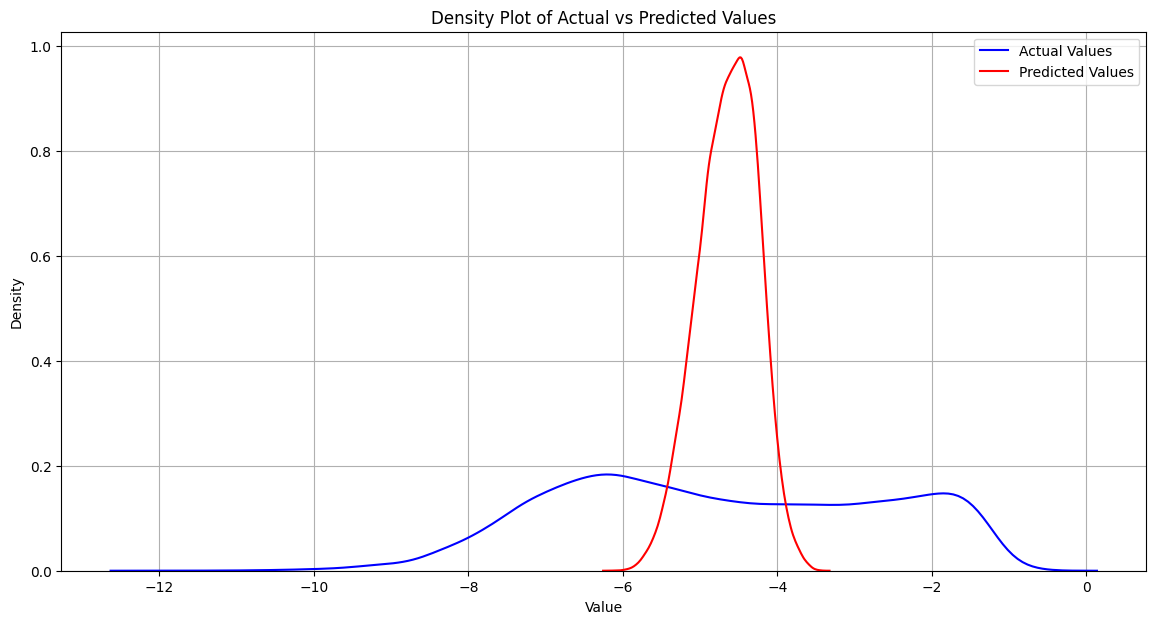

: 

In [2]:
# Make predictions on the test set
predictions = model.predict(test_features_no_outliers).flatten()

# Evaluate the model
mse = mean_squared_error(test_target_no_outliers, predictions)
r2 = r2_score(test_target_no_outliers, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot density plots for predicted and actual values
plt.figure(figsize=(14, 7))

# Plot density for actual values
sns.kdeplot(test_target_no_outliers, label='Actual Values', color='blue', fill=False)

# Plot density for predicted values
sns.kdeplot(predictions, label='Predicted Values', color='red', fill=False)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs Predicted Values')
plt.legend()
plt.show()